<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/Embedding_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

**Budowanie warstwy Embedding dla słownika składającego się z 10 cyfr**

Bez procesu uczenia

In [2]:
# utworzenie prostego modelu z warstwą Embedding
model = Sequential()
embedding_layer = Embedding(input_dim=10,output_dim=4,input_length=2)
model.add(embedding_layer)
model.compile('adam','mse')

# input_dim - rozmiar słownika
# output_dim - długość wektora dla  każdego słowa
# input_length - maksymalna długość sekwencji

# W powyższym przykładzie ustawiamy 10 jako rozmiar słownictwa, ponieważ będziemy kodować liczby od 0 do 9.
# Chcemy, aby długość wektora słów wynosiła 4, stąd output_dim jest ustawione na 4.
# Długość sekwencji wejściowej do warstwy osadzania będzie wynosić 2 (będziemy podawać na wejściu sieci dwie cyfry)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 4)              40        
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# wydruk wspólczynników wagowych warstwy Embedding
# Poniewaćż nie inicjujemy procesu uczenia wartości wag są losowe

print(model.weights)

[<tf.Variable 'embedding/embeddings:0' shape=(10, 4) dtype=float32, numpy=
array([[ 0.04904598,  0.01858591, -0.02007126, -0.02552595],
       [-0.02946062, -0.02123396,  0.03412256, -0.00302137],
       [-0.02394114, -0.02776796, -0.0345423 , -0.00422161],
       [ 0.02900541,  0.0168095 , -0.00106485, -0.0067815 ],
       [ 0.02968682, -0.04740422, -0.00162083, -0.00240406],
       [-0.02717358,  0.03190272, -0.04689808, -0.03944625],
       [ 0.0435021 ,  0.03977196,  0.04693612,  0.03889617],
       [-0.02779729,  0.00850797,  0.04949093, -0.03497918],
       [ 0.01109295,  0.01071211, -0.02503854, -0.04367982],
       [-0.02446722,  0.03542474, -0.02460161, -0.02766456]],
      dtype=float32)>]


Te wagi są reprezentacjami wektorowymi słów w słownictwie.
Tabela wag o rozmiarze 10 x 4, dla słów od 0 do 9.


In [11]:
# Teraz przekażmy przykładowe dane wejściowe do  modelu i zobaczmy wyniki.
input_data = np.array([[1,2]])
pred = model.predict(input_data)
print("-----------------------------------------------------------------")
print("Dane wejściowe modelu:", input_data.shape)

print("-----------------------------------------------------------------")
print("")
print("Wartości wag warstwy Embedding dla podanych na wejsciu danych:")
print(pred)

1/1 [==============================] - 0s 29ms/step
-----------------------------------------------------------------
Dane wejściowe modelu: (1, 2)
-----------------------------------------------------------------

Wartości wag warstwy Embedding dla podanych na wejsciu danych:
[[[-0.02946062 -0.02123396  0.03412256 -0.00302137]
  [-0.02394114 -0.02776796 -0.0345423  -0.00422161]]]


Jak widać, każde słowo (1 i 2) jest reprezentowane przez wektor o długości 4.

W tym przykładzie nie wytrenowaliśmy warstwy osadzania. Wagi przypisane do wektorów słów są inicjowane losowo.

**Klasyfikacja recenzji restauracji**


Tok działań:    
*   Tokenizacja zdań na słowa.
*   Utwórzenie zakodowanego wektor "one-hot" dla każdego słowa.
*   Użycie funkcji "Padding", w celu ujednolicenia rozmiaru sekekwencji wejściowej modelu (upewnienia się, że wszystkie sekwencje mają tę samą długość).
*   Przekazanie wypełnionych sekwencji jako danych wejściowwych do warstwy Embedding.
*   Spłaszczennie danych do wktora i zastostosowanie  warstwę Dense, aby przewidywać etykietę

    
    

In [12]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

Aby to uprościć, użyjemy łącznie tylko  10 przykładowych, prostych  recenzji. Połowa z nich jest pozytywna, reprezentowana przez 0, a druga połowa jest negatywna, reprezentowana przez 1.

In [14]:
#definicja 10 recencji
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]

#definicja etykiet (1-negatywane, 0-pozytywna)
labels = array([1,1,1,1,1,0,0,0,0,0])

Przyjmiemy rozmiar słownictwa jako 50 i zakodujemy słowa za pomocą funkcji "one_hot" z Keras.

In [15]:
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

encoded reviews: [[36, 48, 19], [36, 48], [8, 4], [40, 49], [36, 49], [12], [12, 9], [48], [17, 45], [10, 28, 7, 10]]


Widać, że długość każdej zakodowanej recenzji jest równa liczbie słów w tej recenzji. Keras one_hot  konwertuje każde słowo na zakodowany indeks one-hot.

Teraz musimy zastosować "padding", aby wszystkie zakodowane recenzje miały tę samą długość.

Zdefiniujmy 4 jako maksymalną długość i wypełnijmy zakodowane wektory zerami na końcu.

In [16]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

#Wypełnione i zakodowane recenzje będą wyglądać następująco:

[[36 48 19  0]
 [36 48  0  0]
 [ 8  4  0  0]
 [40 49  0  0]
 [36 49  0  0]
 [12  0  0  0]
 [12  9  0  0]
 [48  0  0  0]
 [17 45  0  0]
 [10 28  7 10]]


Po utworzeniu ujednoliconej pod względem rozmiaru, zakodowanje  reprezentacji recenzji, jesteśmy gotowi do przekazania jej jako danych wejściowych do warstwy osadzania.

W poniższym fragmencie kodu tworzymy prosty model Keras.

Ustalimy arbitralnie długość osadzonych wektorów dla każdego słowa na 8, a długość wejściowa będzie maksymalną długością, którą już zdefiniowaliśmy jako 4.

In [45]:
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length, name="wmi-embedding")

In [49]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Proces uczenia zdefiniowanego modelu**

In [50]:
history = model.fit(padded_reviews,labels,epochs=30,verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 632ms/step - loss: 0.6841 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6818 - accuracy: 0.6000
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6795 - accuracy: 0.6000
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6772 - accuracy: 0.6000
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6748 - accuracy: 0.6000
Epoch 6/30
1/1 [==============================] - 0s 14ms/step - loss: 0.6725 - accuracy: 0.7000
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6702 - accuracy: 0.8000
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6679 - accuracy: 0.8000
Epoch 9/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6657 - accuracy: 0.8000
Epoch 10/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6634 - accuracy: 0.8000
Epoch 11/30
1/1 [===========

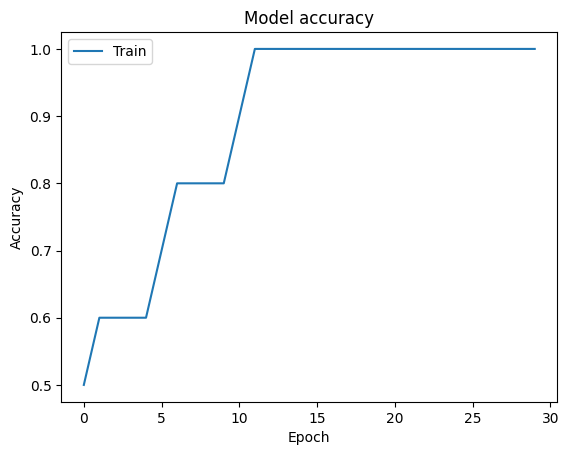

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Po zakończeniu treningu warstwa osadzania nauczyła się wag, które są niczym innym jak reprezentacjami wektorowymi każdego słowa. Sprawdźmy kształt macierzy wag.

In [23]:
print(embedding_layer.get_weights()[0].shape)

(50, 8)


In [24]:
# Jeśli sprawdzimy osadzenie dla pierwszego słowa, otrzymamy następujący wektor.
embedding_layer.get_weights()[0][0]

array([ 0.04851203, -0.11075204,  0.10378705,  0.05636813,  0.05719429,
       -0.07346848, -0.16577914, -0.10423633], dtype=float32)

In [26]:
weights = model.get_layer('wmi-embedding').get_weights()[0]
weights

array([[ 0.04851203, -0.11075204,  0.10378705,  0.05636813,  0.05719429,
        -0.07346848, -0.16577914, -0.10423633],
       [ 0.00298854,  0.01044493,  0.02287051, -0.03371505, -0.00474351,
        -0.04846238,  0.04859843,  0.04726615],
       [ 0.0126707 ,  0.01779891, -0.02174922,  0.04905101, -0.00167285,
        -0.03911553,  0.0147979 , -0.00747634],
       [-0.01913589, -0.01298629,  0.00604038,  0.01522937, -0.03617267,
         0.01281073,  0.00749461, -0.00292525],
       [-0.11054561,  0.13014543, -0.08662777, -0.12499596, -0.07589606,
         0.12794085,  0.14441918,  0.1304295 ],
       [ 0.03123878, -0.03851577,  0.00698046, -0.0079921 ,  0.00209995,
         0.04975987, -0.01187881,  0.0011056 ],
       [-0.01686465, -0.036445  ,  0.0448685 , -0.04299518,  0.04232055,
         0.02577514, -0.01014434, -0.02579236],
       [-0.09814645,  0.07409479,  0.08487518, -0.05488968, -0.07794409,
        -0.15437928, -0.11737133,  0.09343459],
       [-0.05286421, -0.14167976

**Przygotowanie danych do prezentacji współczynników wagowych wyuczonej warstwy Embedding  na platformie Embedding Projector**

In [37]:
# definicja funkcji standaryzującej

import tensorflow as tf

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)

  return lowercase


In [38]:
from tensorflow.keras.layers import TextVectorization

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=Vocab_size,
    output_mode='int',
    output_sequence_length=max_length)



In [39]:
vectorize_layer.adapt(reviews)

In [40]:
vocab = vectorize_layer.get_vocabulary()


In [41]:
vocab

['',
 '[UNK]',
 'horrible',
 'awesome',
 'work',
 'waitress',
 'services!',
 'service',
 'rude',
 'rocks',
 'poor',
 'never',
 'have',
 'food!',
 'food',
 'done',
 "couldn't",
 'coming',
 'cold',
 'better',
 'back!']

In [44]:
import io
import os
out_v = io.open('/content/drive/MyDrive/dane/embeddings/vectors01.tsv', 'w', encoding='utf-8')
out_m = io.open('/content/drive/MyDrive/dane/embeddings/metadata01.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # pomijając 0, bo jest to wypełnienie.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

 http://projector.tensorflow.org/?_gl=1*rggcgk*_ga*NzAyNjA5OTg4LjE2OTQ1MDIxMDc.*_ga_W0YLR4190T*MTcwMDgyODU5Ny44LjEuMTcwMDgzMDA3MS4wLjAuMA..
